In [1]:
import numpy as np
# import matplotlib
# matplotlib.use("AGG")
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "100"
plt.style.use("/afs/ihep.ac.cn/users/f/fuys/.config/matplotlib/Paper.mplstyle")

In [2]:
arr = np.load('./data/data_array_0918_all.npy')
print(len(arr)/6146)

8135.372600065083


In [3]:
# package_len = 514*8
package_len = 6146
sam_points = 1000
all_useful_data = np.array([])

package_num = 20
chan_dict={}
for chan in range(33):
    chan_dict[str(chan)] = np.array([])

corr_dict={}
for chan in range(32):
    corr_dict[str(chan)] = np.array([])
    
for index in range(package_num):
# for index in range(int(len(arr)/package_len)):
    
    # if index !=3:
    if 1>0:
        package_data = arr[index*package_len:(index+1)*package_len]
        # print(package_data[0][0],"head info")
        # print(package_data[0][2],"length info")
        """remove head and tail"""
        select_data = package_data[1:-1].flatten()*75/(1e6)*1000
        cut_point = 100
        cut_data = select_data[0+cut_point:33*sam_points+cut_point]
        all_useful_data = np.append(all_useful_data, cut_data)

        """strange method"""
        for chann in range(32):
            # data = cut_data[chann*sam_points:(chann+1)*sam_points] 
            data = np.array(cut_data[(chann+1)*sam_points:(chann+2)*sam_points])  - np.array(cut_data[chann*sam_points:(chann+1)*sam_points])
            corr = np.corrcoef(np.array(cut_data[(chann+1)*sam_points:(chann+2)*sam_points]),np.array(cut_data[chann*sam_points:(chann+1)*sam_points]))
            corr_dict[str(array_index)] = np.append(corr_dict[str(array_index)], corr[0][1])
            
            result = data[60:70]
            array_index = chann % 33
            chan_dict[str(array_index)] = np.append(chan_dict[str(array_index)], result)

NameError: name 'array_index' is not defined

/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
[1052.07, 507.66, 222.99, 178.49, 209.09, 201.54, 216.1, 202.5, 198.81, 205.72, 237.63, 179.9, 183.83, 242.5, 229.11, 250.71, 232.78, 197.67, 191.49, 201.11, 231.39, 240.73, 218.4, 230.63, 222.12, 217.16, 204.97, 215.95, 232.69, 263.83, 338.16, 148.12]


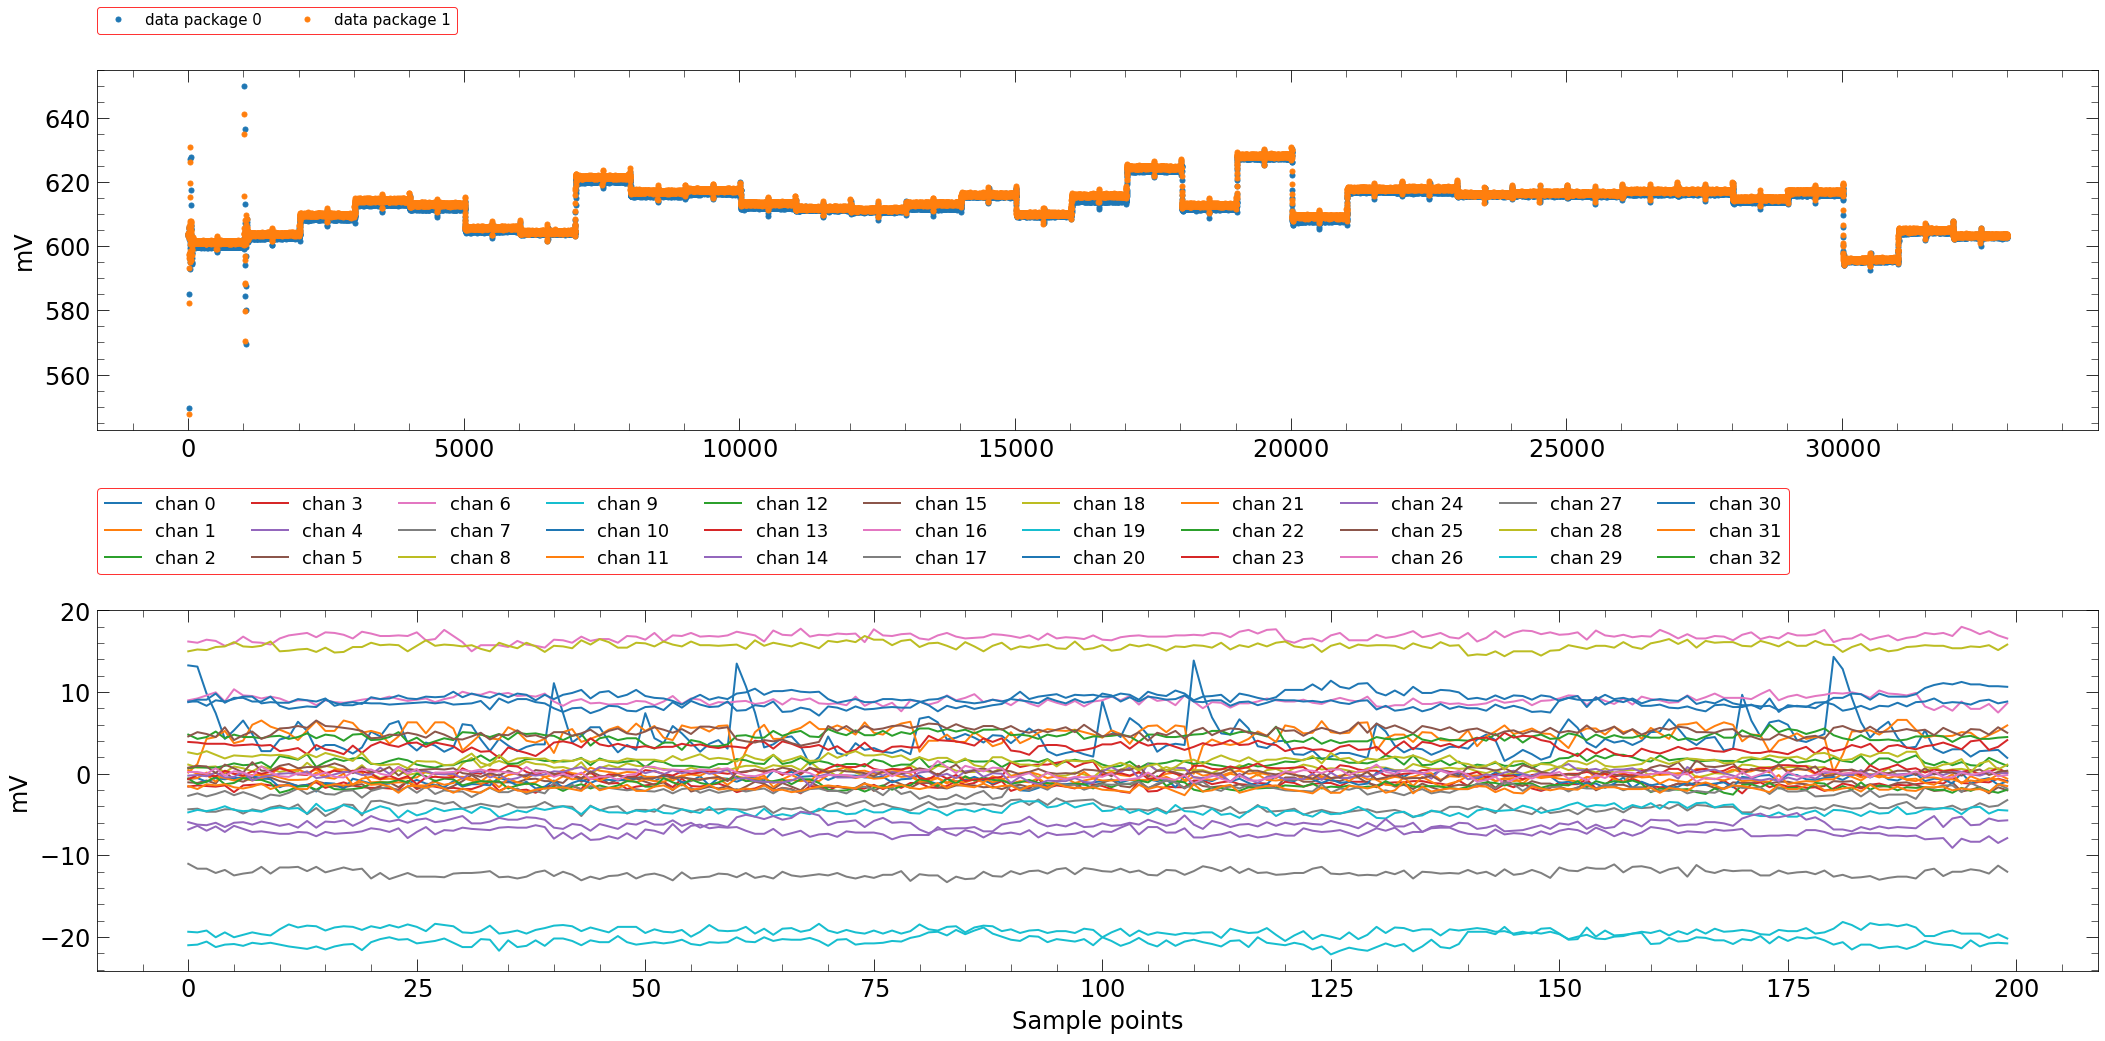

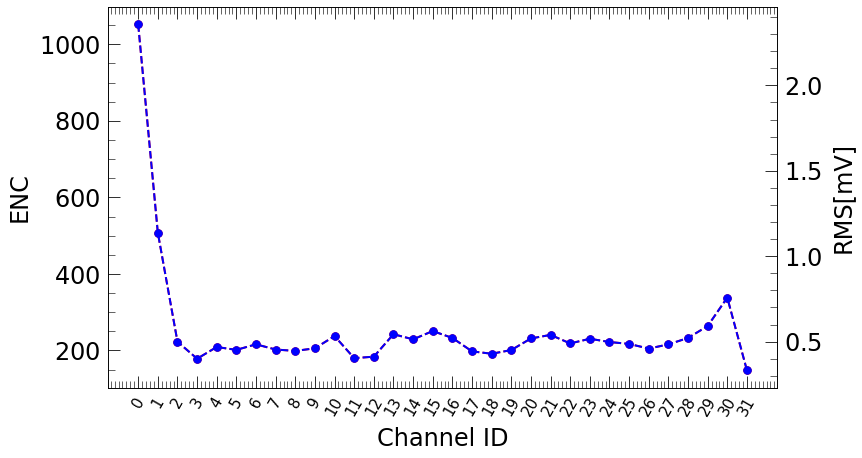

In [ ]:



fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(30, 15))
dis_chan_range = [0,33]
for n in range(0,2):
    ax[0].plot(all_useful_data[dis_chan_range[0]*1000+33000*n:dis_chan_range[1]*1000+33000*n],\
               '.',label="data package %s"%n)

for index in range(33):
    # if index == 32:
    ax[1].plot(chan_dict[str(index)],label='chan %s'%index)
    
# ax.hist(chan_dict[str(5)],label='channel_%s'%index)

ax[1].set_xlabel("Sample points")
ax[0].set_ylabel("mV")
ax[1].set_ylabel("mV")
# ax.set_ylim(550,675)
ax[0].legend(frameon=True, edgecolor='red',fontsize=15,loc=[0.0,1.1],ncol=11)
ax[1].legend(frameon=True, edgecolor='red',fontsize=18,loc=[0.0,1.1],ncol=11)
plt.tight_layout()
plt.savefig("./plots/waveform_display.pdf")



# fig, ax = plt.subplots(nrows=7,ncols=5,figsize=(28,24))
# # for index in range(33):
# index=0
# for row in range(7):
#     for col in range(5):
#         if index > 32:
#             break
#         ax[row, col].hist(chan_dict[str(index)])
#         ax[row, col].set_title('chan %s'%index)
#         index+=1
# plt.tight_layout()
# plt.savefig("./plots/waveform_hist.pdf")

chan_index=[]
ENC_value=[]
Vstd_value=[]
for index, value in chan_dict.items():
    # print("std",np.std(value))
    chan_index.append(index)
    ENC_value.append(np.std(value)/14*6250)
    Vstd_value.append(np.std(value))
    # print("Chan: %s V std %0.2f"%(index,np.std(value)))
    # print("ENC",np.std(value)/14*6250)

print(chan_index[:-1])
print([round(num, 2) for num in ENC_value[:-1]])


fig, ax = plt.subplots(figsize=(12, 7))
ax2 = ax.twinx()
ax.plot(chan_index[:-1], ENC_value[:-1],'.r--',markersize=15)
ax2.plot(chan_index[:-1], Vstd_value[:-1],'.b--',markersize=15)
ax.set_xlabel("Channel ID")
ax.set_ylabel("ENC")
ax2.set_ylabel("RMS[mV]")
ax.set_xticklabels(labels=chan_index,rotation=60,size=15)
plt.savefig("./plots/ENC_results.pdf")

In [ ]:
print(2/14*6250,"ENC")

892.8571428571428 ENC


/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(-5.0, 0, '0'),
 Text(0.0, 0, '1'),
 Text(5.0, 0, '2'),
 Text(10.0, 0, '3'),
 Text(15.0, 0, '4'),
 Text(20.0, 0, '5'),
 Text(25.0, 0, '6'),
 Text(30.0, 0, '7'),
 Text(35.0, 0, '8')]

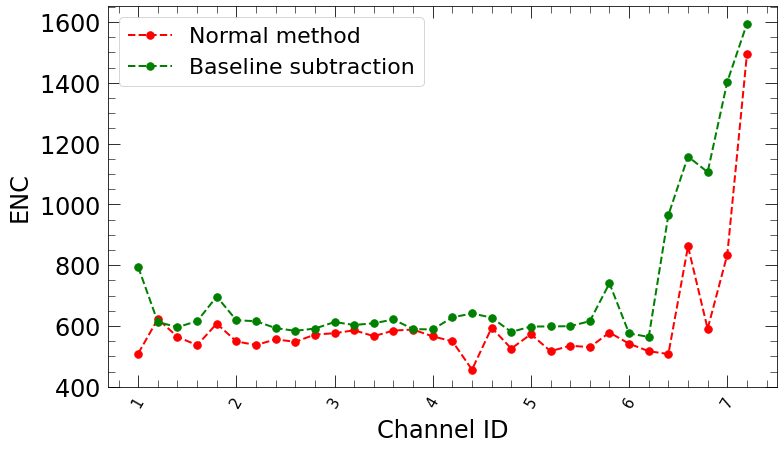

In [ ]:
index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', \
         '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
origin_cal = [509.63, 623.16, 564.52, 536.97, 607.83, 549.38, 537.51, 556.22, 548.05, 572.0, 576.35, 586.0,\
               566.67, 585.14, 588.36, 565.98, 549.89, 456.52, 594.42, 525.88, 573.25, 517.14, 535.39, 530.48, \
                  578.55, 541.96, 517.23, 507.97, 861.7, 590.9, 834.7, 1493.55]

minus_baseline = [794.01, 613.2, 596.28, 615.95, 696.81, 619.12, 615.79, 593.26, 584.25, 591.67, 613.11, \
                  603.47, 609.09, 621.51, 589.77, 588.91, 628.41, 641.4, 627.68, 580.67, 598.33, 598.67,\
                       599.51, 616.02, 740.53, 575.55, 564.32, 965.03, 1157.35, 1106.19, 1402.92, 1593.97]

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(range(32), origin_cal,'.r--',markersize=15,label="Normal method")
ax.plot(range(32), minus_baseline,'.g--',markersize=15,label="Baseline subtraction")
ax.set_xlabel("Channel ID")
ax.legend()
ax.set_ylabel("ENC")
# ax2.set_ylabel("RMS[mV]")
ax.set_xticklabels(labels=chan_index,rotation=60,size=15)

In [ ]:

# chan_dict={}
# for chan in range(33):
#     chan_dict[str(chan)] = np.array([])

# package_len = 6146
# all_useful_data = np.array([])
# for index in range(0, 10):
# # for index in range(int(len(arr)/package_len)):
    
#     # if index != 59 and index != 69:
#     if 1>0:
#         package_data = arr[index*package_len:(index+1)*package_len]
#         # print(package_data[0][0],"head info")
#         """remove head and tail"""
#         select_data = package_data[1:-1].flatten()*75/(1e6)*1000
#         select_data = select_data[1000:] - select_data[:-1000]
#         cut_data = select_data[150:33150]
#         # cut_data = select_data[0:33000]
#         all_useful_data = np.append(all_useful_data, cut_data)


#         for chann in range(33):
#             data = cut_data[chann*1000:(chann+1)*1000] 
#             result = np.append(data[100:400],data[600:900])
#             array_index = chann % 33
#             chan_dict[str(array_index)] = np.append(chan_dict[str(array_index)], result)

# all_useful_data = [1000:] - all_useful_data[0:-1000]

Text(0, 0.5, 'Corr.')

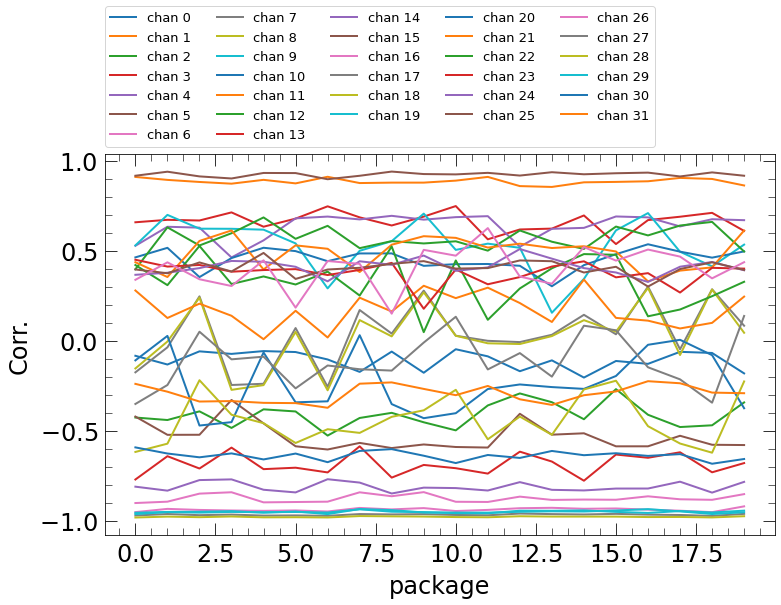

In [ ]:
# print(a)

fig, ax = plt.subplots(figsize=(12, 7))

# for i in range(int(len(a)/32)):
for index in range(32):
    # if index == 32:
    ax.plot(corr_dict[str(index)],label='chan %s'%index)
    # ax.plot(a[0+i*32:(i+1)*32],'.',label='package %s'%(i+1))

ax.legend(loc=(0.0, 1.02),ncol=5,fontsize=13)
ax.set_xlabel('package')
# ax.set_xlabel('Channel')
ax.set_ylabel('Corr.')